<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Предварительный-вывод" data-toc-modified-id="Предварительный-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предварительный вывод</a></span></li></ul></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Проверим-наличие-дубликатов" data-toc-modified-id="Проверим-наличие-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим наличие дубликатов</a></span></li><li><span><a href="#Проверим-наличие-неявных-дубликатов" data-toc-modified-id="Проверим-наличие-неявных-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим наличие неявных дубликатов</a></span></li><li><span><a href="#Проверим-пропуски-в-наших-данных" data-toc-modified-id="Проверим-пропуски-в-наших-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверим пропуски в наших данных</a></span></li><li><span><a href="#Предварительный-вывод" data-toc-modified-id="Предварительный-вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предварительный вывод</a></span></li></ul></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ признаков</a></span><ul class="toc-item"><li><span><a href="#Предварительный-вывод" data-toc-modified-id="Предварительный-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предварительный вывод</a></span></li></ul></li><li><span><a href="#Использование-пайплайнов-и-обучение-модели" data-toc-modified-id="Использование-пайплайнов-и-обучение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Использование пайплайнов и обучение модели</a></span></li></ul></div>

# Разработка модели для предсказания риска наступления сердченого приступа

# Описание проекта

1. Разработать модель для предсказания риска сердечного приступа, используя данные пациентов, такие как возраст, привычки, состояние здоровья и результаты анализа крови.
2. Сделать на основе лучшей модели приложение для получения предсказаний по пользовательскому запросу.

# Описание данных

Данные представлены в виде 2 **csv файлов(обучающая и тестовая выборки), они содержат информацию о пациентах:**

* id - идентификационный номер
* антропометрические параметры (вес, возраст, рост)
* привычки (курение, качество сна и т.д)
* давление
* наличие хронических заболеваний
* биохимия крови
* целевой признак - высокий или низкий риск поражения сердца

# План исследования

* Загрузка и изучение данных
* Предобработка данных
* Исследовательский анализ данных
* Корреляционный анализ
* Использование пайплайнов
* Обучим разные модели и посмотрим на результаты их работы
* Анализ важности признаков
* Общий вывод

## Загрузка данных

In [1]:
!pip install phik -q

In [2]:
import pandas as pd
import numpy as np
import re
import phik
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (confusion_matrix, 
                             classification_report, 
                             roc_auc_score, 
                             average_precision_score, 
                             precision_score, 
                             recall_score, 
                             fbeta_score,
                             RocCurveDisplay,
                             PrecisionRecallDisplay,
                             make_scorer)
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import joblib

In [3]:
heart_test = pd.read_csv('/users/admin/datasets/WorkShop/heart_test.csv', index_col=0)
heart_train = pd.read_csv('/users/admin/datasets/WorkShop/heart_train.csv', index_col=0)

In [4]:
heart_test.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,2,...,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,2,...,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,0,...,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,0,...,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,0,...,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825


In [5]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 965
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              966 non-null    float64
 1   Cholesterol                      966 non-null    float64
 2   Heart rate                       966 non-null    float64
 3   Diabetes                         935 non-null    float64
 4   Family History                   935 non-null    float64
 5   Smoking                          935 non-null    float64
 6   Obesity                          935 non-null    float64
 7   Alcohol Consumption              935 non-null    float64
 8   Exercise Hours Per Week          966 non-null    float64
 9   Diet                             966 non-null    int64  
 10  Previous Heart Problems          935 non-null    float64
 11  Medication Use                   935 non-null    float64
 12  Stress Level               

In [6]:
heart_train.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,1,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,2,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,2,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,0,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,1,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047


In [7]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8442 non-null   float64
 4   Family History                   8442 non-null   float64
 5   Smoking                          8442 non-null   float64
 6   Obesity                          8442 non-null   float64
 7   Alcohol Consumption              8442 non-null   float64
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   int64  
 10  Previous Heart Problems          8442 non-null   float64
 11  Medication Use                   8442 non-null   float64
 12  Stress Level             

In [8]:
heart_train['Gender'].value_counts()

Gender
Male      5882
Female    2560
1.0        156
0.0         87
Name: count, dtype: int64

### Предварительный вывод

1. В данных присутствуют пропуски судя по разному колличетсву строк по данным
2. Имеется частичная кодировка признака `Gender`
3. Есть столбец с порядковым номером пациентов, а также столбец с их уникальным `id`, оставим один из них, колонку с порядковыми номерами удалим.

## Предобработка

### Проверим наличие дубликатов

In [9]:
heart_train.duplicated().sum()

0

In [10]:
heart_test.duplicated().sum()

0

### Проверим наличие неявных дубликатов

In [11]:
def checking_duplicates(a):
    for column in a.select_dtypes(exclude=['number']).columns:
        print(f"Уникальные значения в '{column}': {a[column].unique()}")

In [12]:
checking_duplicates(heart_train)

Уникальные значения в 'Gender': ['Male' 'Female' '1.0' '0.0']


In [13]:
checking_duplicates(heart_test)

Уникальные значения в 'Gender': ['Male' 'Female' '1.0' '0.0']


### Проверим пропуски в наших данных

In [14]:
heart_train.isna().sum()

Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure              0
Diastolic blood pressure 

Посмотрим на наши данные с пропусками

In [15]:
heart_train[heart_train['Diabetes'].isna()].head(10)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
16,0.449438,0.49978,0.063245,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.233202,0.026692,0.000777,1.0,0.393548,0.255814,9528
90,0.370787,0.49978,0.066911,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.154150,0.004702,0.042043,1.0,0.258065,0.337209,9640
92,0.629213,0.49978,0.073327,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.256917,0.012310,0.000777,0.0,0.258065,0.232558,9515
185,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.559289,0.006704,0.000291,0.0,0.174194,0.151163,9491
188,0.269663,0.49978,0.035747,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.112648,0.051218,0.000485,0.0,0.225806,0.162791,9448
204,0.674157,0.49978,0.065078,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.120553,0.002299,0.003010,1.0,0.167742,0.162791,9594
247,0.629213,0.49978,0.084326,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.150198,0.002933,0.133896,1.0,0.677419,0.720930,9570
392,0.370787,0.49978,0.067828,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.197628,0.119858,0.025439,1.0,0.258065,0.453488,9649
415,0.415730,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.140316,0.004435,0.001748,1.0,0.470968,0.593023,9625
416,0.404494,0.49978,0.102658,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,NaN,0.504621,0.0,0.193676,0.009540,0.034275,1.0,0.387097,0.372093,9574


Как мы видим наблюдаются большое количество пропусков в одних и тех строках по разным столбцам. Данные уже отмасштабированы. К тому же, в столбце **`Gender`** признак имеет категориально значение, вместо **`Male` и `Female`** он обозначен как **`1` и `0`**. Судя по всему при стандартизации мог произойти сбой. Данные строки составляют менее 3% от всего массива тренировочных данных, целесообразнее их будет удалить.

In [16]:
heart_train = heart_train.dropna().reset_index(drop=True)
heart_train.isna().sum()

Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk (Binary)         0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Gender                             0
Systolic blood pressure            0
Diastolic blood pressure           0
id                                 0
d

In [17]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8442 entries, 0 to 8441
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8442 non-null   float64
 1   Cholesterol                      8442 non-null   float64
 2   Heart rate                       8442 non-null   float64
 3   Diabetes                         8442 non-null   float64
 4   Family History                   8442 non-null   float64
 5   Smoking                          8442 non-null   float64
 6   Obesity                          8442 non-null   float64
 7   Alcohol Consumption              8442 non-null   float64
 8   Exercise Hours Per Week          8442 non-null   float64
 9   Diet                             8442 non-null   int64  
 10  Previous Heart Problems          8442 non-null   float64
 11  Medication Use                   8442 non-null   float64
 12  Stress Level        

Аналогично проверим наши тестовые данные

In [18]:
heart_test.isna().sum()

Age                                 0
Cholesterol                         0
Heart rate                          0
Diabetes                           31
Family History                     31
Smoking                            31
Obesity                            31
Alcohol Consumption                31
Exercise Hours Per Week             0
Diet                                0
Previous Heart Problems            31
Medication Use                     31
Stress Level                       31
Sedentary Hours Per Day             0
Income                              0
BMI                                 0
Triglycerides                       0
Physical Activity Days Per Week    31
Sleep Hours Per Day                 0
Blood sugar                         0
CK-MB                               0
Troponin                            0
Gender                              0
Systolic blood pressure             0
Diastolic blood pressure            0
id                                  0
dtype: int64

Посмотрим на них что они из себя представляют

In [19]:
heart_test[heart_test['Diabetes'].isna()].head(10)

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
27,0.370787,0.49978,0.034830,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.181818,0.011843,0.000194,1.0,0.419355,0.441860,9613
37,0.573034,0.49978,0.043080,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.167984,0.011209,0.000971,1.0,0.722581,0.732558,9471
58,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.098814,0.036436,0.002233,1.0,0.387097,0.500000,9486
60,0.370787,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.199605,0.005970,0.006408,1.0,0.387097,0.220930,9391
61,0.483146,0.49978,0.028414,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.112648,0.013111,0.000680,1.0,0.419355,0.325581,9579
156,0.516854,0.49978,0.045830,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.219368,1.000000,0.000583,1.0,0.335484,0.220930,9490
208,0.449438,0.49978,0.036664,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.264822,0.008906,0.002136,1.0,0.380645,0.186047,9617
235,0.325843,0.49978,0.029331,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.128458,0.002196,0.000583,0.0,0.387097,0.302326,9465
265,0.471910,0.49978,0.056829,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.083004,0.020218,0.000485,0.0,0.096774,0.441860,9562
339,0.348315,0.49978,0.054079,NaN,NaN,NaN,NaN,NaN,0.50211,3,...,0.503603,NaN,0.504621,0.207510,0.006137,0.000388,0.0,0.174194,0.151163,9412


С тетсовыми данными поступим по аналогии как и с тренировочными

In [20]:
heart_test = heart_test.dropna().reset_index(drop=True)
heart_test.isna().sum()

Age                                0
Cholesterol                        0
Heart rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Blood sugar                        0
CK-MB                              0
Troponin                           0
Gender                             0
Systolic blood pressure            0
Diastolic blood pressure           0
id                                 0
dtype: int64

In [21]:
heart_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              935 non-null    float64
 1   Cholesterol                      935 non-null    float64
 2   Heart rate                       935 non-null    float64
 3   Diabetes                         935 non-null    float64
 4   Family History                   935 non-null    float64
 5   Smoking                          935 non-null    float64
 6   Obesity                          935 non-null    float64
 7   Alcohol Consumption              935 non-null    float64
 8   Exercise Hours Per Week          935 non-null    float64
 9   Diet                             935 non-null    int64  
 10  Previous Heart Problems          935 non-null    float64
 11  Medication Use                   935 non-null    float64
 12  Stress Level          

In [22]:
heart_train.describe()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id
count,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,...,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000,8442.000000
mean,0.449008,0.501108,0.050194,0.652097,0.489576,0.902867,0.498342,0.601990,0.503415,1.001540,...,0.505539,3.508292,0.503712,0.356906,0.227998,0.047745,0.036867,0.451955,0.501672,4696.392087
std,0.232809,0.288785,0.018442,0.476333,0.499921,0.296157,0.500027,0.489517,0.288881,0.812981,...,0.290412,2.281772,0.332749,0.479115,0.074623,0.070399,0.059284,0.170187,0.170302,2704.773301
min,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161290,0.209302,1.000000
25%,0.247191,0.260714,0.034830,0.000000,0.000000,1.000000,0.000000,0.000000,0.253359,0.000000,...,0.257143,2.000000,0.166667,0.000000,0.227018,0.048229,0.036512,0.303226,0.348837,2359.250000
50%,0.460674,0.496429,0.050412,1.000000,0.000000,1.000000,0.000000,1.000000,0.508244,1.000000,...,0.507792,3.000000,0.500000,0.000000,0.227018,0.048229,0.036512,0.451613,0.500000,4694.500000
75%,0.640449,0.750000,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.754901,2.000000,...,0.758442,6.000000,0.833333,1.000000,0.227018,0.048229,0.036512,0.600000,0.651163,7030.750000
max,0.853933,1.000000,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.741935,0.790698,9376.000000


In [23]:
heart_test.describe()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,...,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.452106,0.487796,0.050624,0.656684,0.481283,0.898396,0.516578,0.583957,0.490327,0.989305,...,0.476200,0.486127,3.443850,0.512834,0.225876,0.049011,0.034728,0.449722,0.500759,4612.228877
std,0.233873,0.286674,0.018031,0.475070,0.499917,0.302289,0.499993,0.493165,0.289584,0.823824,...,0.296775,0.289200,2.302778,0.327594,0.063750,0.074523,0.044943,0.171918,0.173262,2727.818068
min,0.044944,0.000000,0.018332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,...,0.002598,0.000000,0.000000,0.000000,0.029644,0.000000,0.000194,0.161290,0.209302,0.000000
25%,0.235955,0.235714,0.036664,0.000000,0.000000,1.000000,0.000000,0.000000,0.235647,0.000000,...,0.211395,0.243506,1.000000,0.166667,0.227018,0.048229,0.036512,0.296774,0.348837,2231.500000
50%,0.460674,0.485714,0.050412,1.000000,0.000000,1.000000,1.000000,1.000000,0.493305,1.000000,...,0.456156,0.471429,3.000000,0.500000,0.227018,0.048229,0.036512,0.458065,0.500000,4625.000000
75%,0.651685,0.723214,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.739898,2.000000,...,0.734170,0.732468,5.000000,0.833333,0.227018,0.048229,0.036512,0.600000,0.651163,7035.000000
max,0.853933,0.996429,0.082493,1.000000,1.000000,1.000000,1.000000,1.000000,0.998938,2.000000,...,0.999496,0.998701,7.000000,1.000000,0.750988,1.000000,0.970871,0.741935,0.790698,9362.000000


### Предварительный вывод

1. Судя по данным, предварительно можно сделать предположение что они не сырые а уже предобработаны и стандартизированы. 
2. Однако в данных присутсвуют пропуски, а также различное представление одного признака `Gender`
    * данный момент мы приняли решение обработать методом удаления данных содержащих пропуски, все строки с пропусками совпадают построчно.
3. Дубликаты в данных не обнаружены.

## Анализ признаков

Изучим наши признаки, какие значения они имеют в медицине для человека.

* **`cholesterol`** - холестерин. Высокий уровень ЛПНП-холестерина запускает каскад событий, известный как атеросклероз, который является основной причиной большинства сердечных приступов.
* **`heart_rate`** - частота сердечных сокращений. Частота сердечных сокращений (ЧСС) в состоянии покоя, показатель, который легко измерить самостоятельно, является важным и независимым фактором риска развития сердечного приступа (инфаркта миокарда) и других сердечно-сосудистых осложнений.
* **`diabetes`** - наличие диабета. Наличие сахарного диабета — это один из самых серьезных факторов риска развития сердечного приступа (инфаркта миокарда). Эта связь настолько сильна, что диабет часто называют "эквивалентом ишемической болезни сердца".
* **`family_history`** - семейный анамнез. В нашем случае признак бинарный и каких-то дополнительных расшифровок нету, а значит скорее всего он просто указывает 1, если у кого-то в семье были серьезные наследственные заболевания, и 0, если нет.
obesity - ожирение. Ожирение является одним из наиболее значимых и многогранных факторов риска развития сердечного приступа (инфаркта миокарда).
* **`alcohol_consumption`** - потребление алкоголя. Связь с риском наступления сердечного приступа нелинейна и полностью зависит от дозы. Необходимо обратить на этот параметр внимание во время корреляционного анализа.
exercise_hours_per_week - количество часов физической активности в неделю, которое проводит человек. Физическая активность — это один из самых эффективных и доступных способов значительно снизить риск развития сердечного приступа (инфаркта миокарда). Взаимосвязь между движением и здоровьем сердца прямая и неоспоримая: чем активнее человек, тем ниже его шансы столкнуться с сердечно-сосудистой катастрофой.
* **`diet`** - диета. Рацион питания напрямую воздействует на основные факторы, провоцирующие сердечный приступ.
* **`previous_heart_problems`** - наличие предыдущих проблем с сердцем.
* **`medication_use`** - использование лекарств. Постоянное использование медикаментов оказывает глубокое и разнонаправленное влияние на риск наступления сердечного приступа (инфаркта миокарда). В зависимости от типа препарата, он может служить как мощным защитным фактором, так и, наоборот, повышать вероятность сердечно-сосудистой катастрофы. Поэтому возможно мы исключим этот признак на этапе обучения по результатам корреляционного анализа, так как у нас нету дополнительной информации об этом параметре.
* **`sedentary_hours_per_day`** - количество часов, которое проводит человек сидя.
* **`income`** - доход.
* **`bmi`** - индекс массы тела. Величина, позволяющая оценить степень соответствия массы человека и его роста и тем самым косвенно судить о том, является ли масса недостаточной, нормальной или избыточной.
* **`triglycerides`** - жиры, также триглицериды, триацилглицериды. Высокий уровень триглицеридов в крови напрямую и значительно повышает риск сердечного приступа. Хотя сами по себе триглицериды не являются частью бляшек, закупоривающих артерии, они активно способствуют развитию атеросклероза — основной причины инфарктов и инсультов.
* **`blood_sugar`** - уровень сахара в крови. Поддержание стабильного уровня сахара в крови в пределах целевых значений является критически важным для снижения риска сердечного приступа, особенно для людей с сахарным диабетом.
* **`ck-mb`** - CK-MB, или креатинкиназа-МВ, — это специфический медицинский показатель, используемый в основном для диагностики повреждений сердечной мышцы (миокарда). Основное применение анализа на CK-MB в медицине — это диагностика повреждений миокарда, в первую очередь, острого инфаркта миокарда (сердечного приступа). Когда клетки сердечной мышцы повреждаются из-за недостатка кровоснабжения, они разрушаются, и их содержимое, включая CK-MB, попадает в кровоток.
* **`troponin`** - тропонин является ключевым белком, который напрямую связан с диагностикой сердечного приступа (инфаркта миокарда) и оценкой риска будущих сердечно-сосудистых событий. Его уровень в крови — это один из самых точных индикаторов повреждения сердечной мышцы.
* **`systolic_blood_pressure`** - систолическое кровяное давление. Верхний показатель при измерении артериального давления — является важнейшим фактором, напрямую связанным с риском развития сердечного приступа (инфаркта миокарда).
* **`diastolic_blood_pressure`** - диастолическое кровяное давление. Диастолическое артериальное давление, или «нижнее» число в показаниях тонометра, играет сложную, но критически важную роль в оценке риска сердечного приступа.

На основе представленных данных и информации из интернета, сделаем следующие выводы. Разделим наши данные на безопасные (без вероятности утечки данных) и опаные, которые несут или могут в себе нести информацию о риске.

In [24]:
безопасные = [
    'age',                                  # возраст
    'cholesterol',                          # холестерин
    'heart rate',                           # пульс (если измерен в покое)
    'diabetes',                             # диабет (диагноз)
    'family history',                       # семейный анамнез
    'smoking',                              # курение
    'obesity',                              # ожирение
    'alcohol consumption',                  # употребление алкоголя
    'exercise hours per week',              # физическая активность
    'diet',                                 # диета
    'stress level',                         # уровень стресса
    'sedentary hours per day',              # сидячий образ жизни
    'income',                               # доход
    'BMI',                                  # ИМТ
    'triglycerides',                        # триглицериды
    'physical activity days per week',      # дни активности
    'sleep hours per day',                  # сон
    'gender',                               # пол
    'systolic_blood_pressure',              # систолическое давление
    'diastolic_blood_pressure'              # диастолическое давление
]

**`CK-MB`** - Креатинкиназа-MB - появляется после повреждения сердца,<br>
**`Troponin`** -  Тропонин - золотой стандарт диагностики ОИМ (появляется после)

Данные признаки категорически исключаем как возможные источники утечки

**`previous__heart__problems, medication__use, blood_sugar`**, данные признаки мы также исключим, так как высока вероятность утечки

Закодируем вручную гендерный признак. Примем **`Male`** - 1, **`Female`** - 0.

In [25]:
heart_train.loc[heart_train['Gender'] == 'Male', 'Gender'] = 1
heart_train.loc[heart_train['Gender'] == 'Female', 'Gender'] = 0
heart_test.loc[heart_test['Gender'] == 'Male', 'Gender'] = 1
heart_test.loc[heart_test['Gender'] == 'Female', 'Gender'] = 0

In [26]:
heart_train['Gender'].value_counts()

Gender
1    5882
0    2560
Name: count, dtype: int64

Проведем корреляционный анализ наших признаков

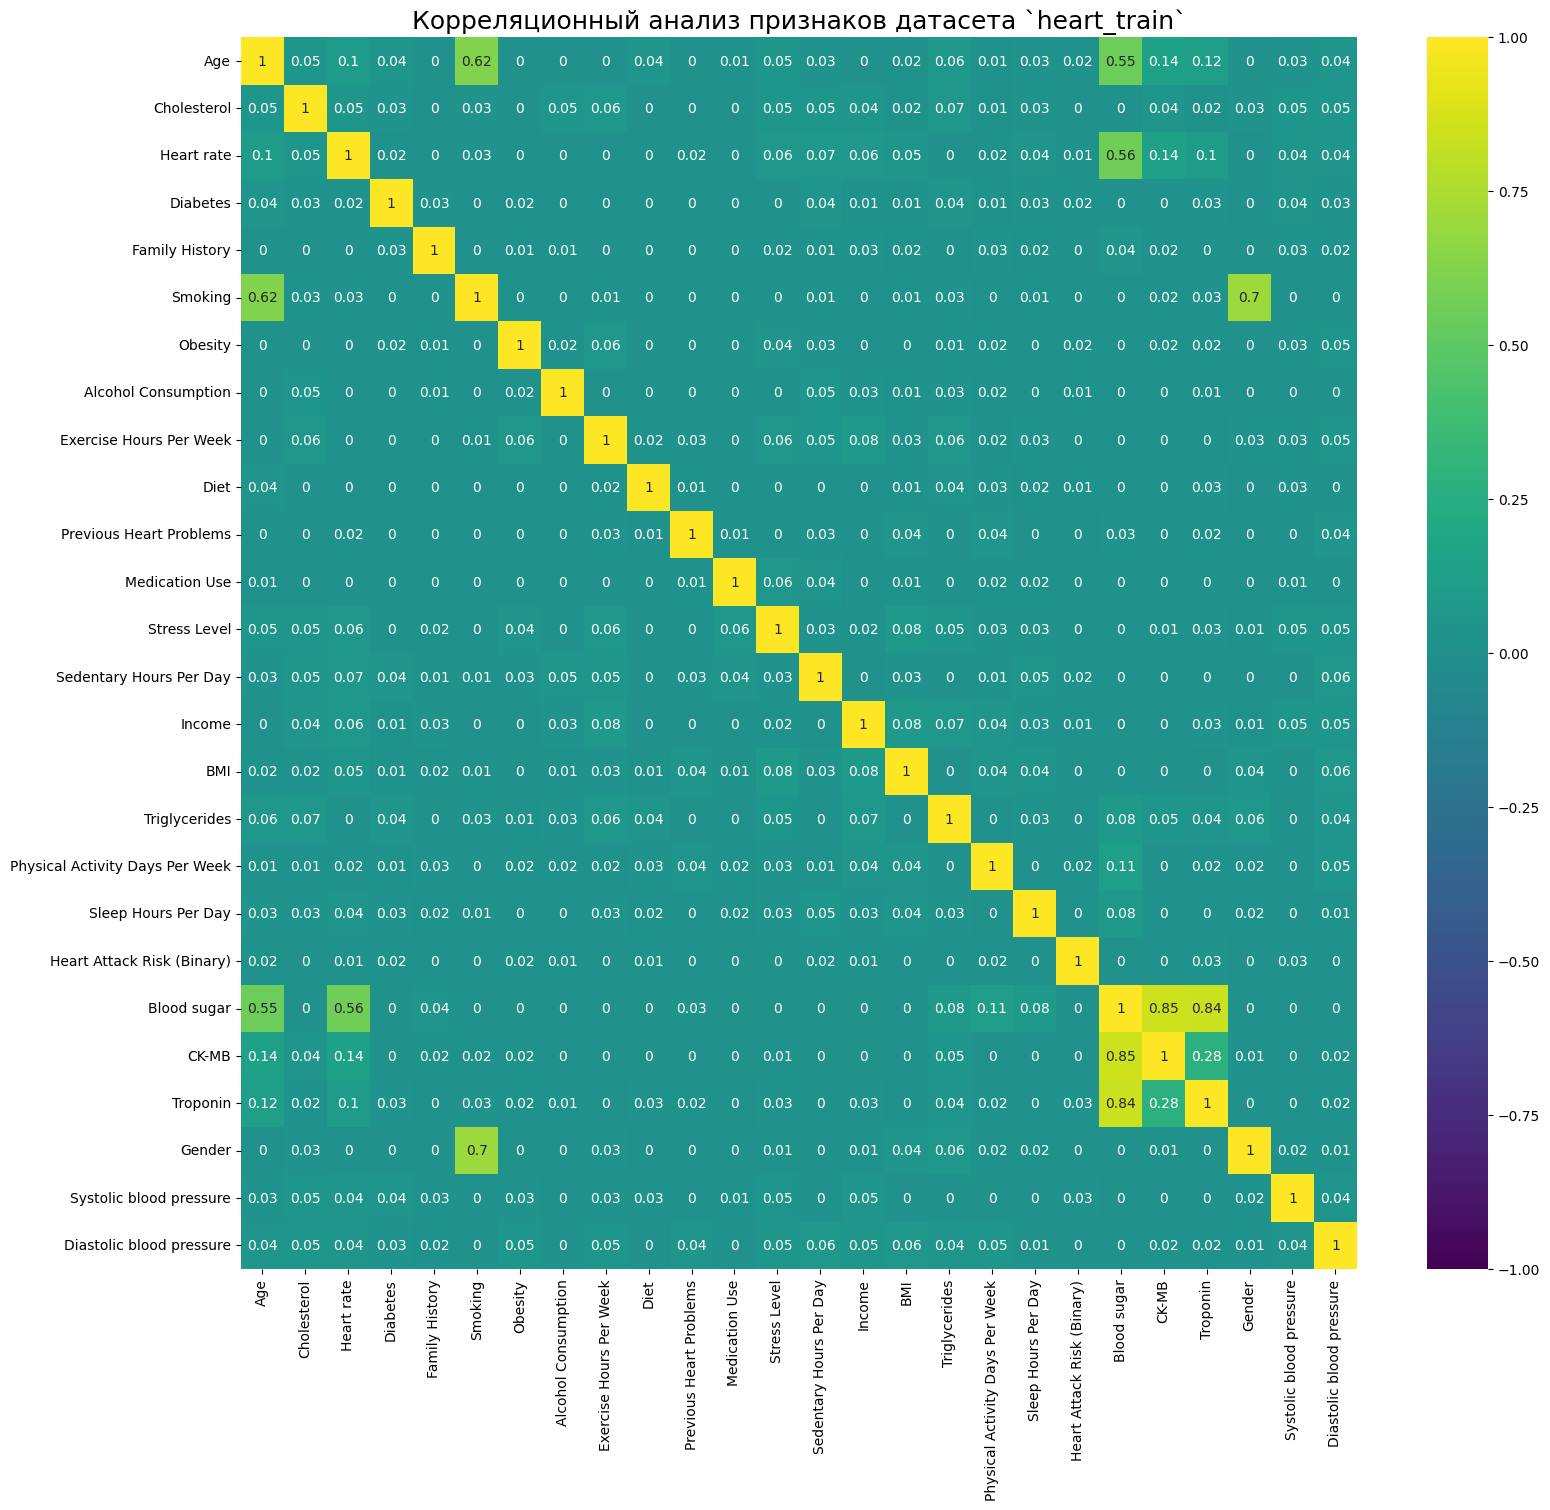

In [27]:
phi_corr = heart_train.drop(['id'], 
     axis=1).phik_matrix(interval_cols=[
    'Age', 'Cholesterol', 'Heart rate', 'Diabetes', 'Family History',
    'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 
    'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
    'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
    'Sleep Hours Per Day', 'Heart Attack Risk (Binary)', 'Blood Ssugar', 'CK-MB', 'Troponin', 
    'Systolic blood pressure', 'Diastolic blood pressure'
    ]).round(2)

plt.figure(figsize=(18, 16))
sns.heatmap(phi_corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Корреляционный анализ признаков датасета `heart_train`', size=18)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_4392\227284967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=heart_train, x='Heart Attack Risk (Binary)', palette='viridis')


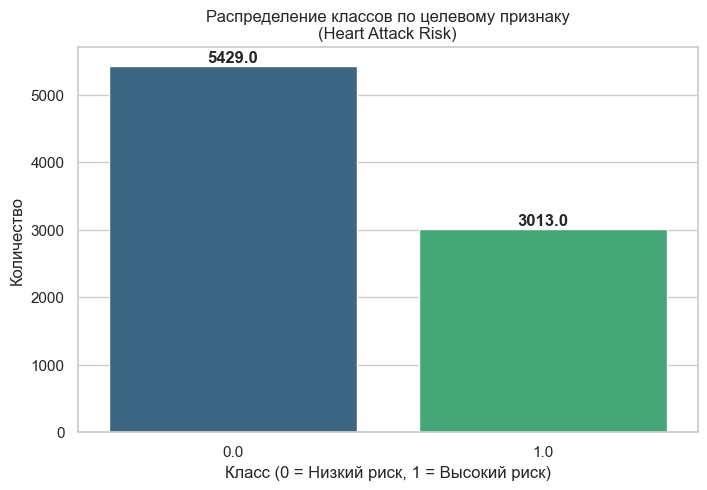

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=heart_train, x='Heart Attack Risk (Binary)', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontweight='bold')

plt.title('Распределение классов по целевому признаку\n(Heart Attack Risk)')
plt.xlabel('Класс (0 = Низкий риск, 1 = Высокий риск)')
plt.ylabel('Количество')
plt.show()

### Предварительный вывод

1. По теоретическим и медицинским соображениям были изучены данные признаки и исключены из данных признаки, которые несут высокий риск утечки данных. То есть те признаки которые несут информацию о перенесенном инфаркте, либо могут нести.
2. По нашим тренировчоным данным мы видим что 30% даных принадлежат женщинам, 70% мужчинам.
3. Корреляционный анализ показал нам абсолютное отсутствие какой либо корреляции между целевым таргетом и признаками. Но также нет их мультиколлинеарности. 
5. На следующем этапе попробует собрать пайплайн и с помощью модели найти зависимости.
6. Дисбаланс классов риска 5429\3013 достаточно умеренный, чтобы не быть главной проблемой, но достаточно заметный, чтобы его нельзя было игнорировать.

## Использование пайплайнов и обучение модели

In [67]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = heart_train.drop(['Heart Attack Risk (Binary)', 
                      'id', 'CK-MB', 'Troponin', 
                      'Previous Heart Problems', 'BMI',
                      'Medication Use', 'Blood sugar', 'Cholesterol'], axis=1)
y = heart_train['Heart Attack Risk (Binary)']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

pipe_final = Pipeline([
    ('selector', SelectKBest()), 
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

В качестве метрики для обучения модели выберем `F2-Score`
Задача прогнозирования сердечного приступа — это классический пример задачи с неравной важностью ошибок.

`False Negative (Ложно-отрицательный)`: Модель предсказывает "низкий риск", а у человека на самом деле высокий риск и случится сердечный приступ. Это очень дорогая ошибка, так как она может стоить жизни. Мы максимально хотим их избежать.

`False Positive (Ложно-положительный)`: Модель предсказывает "высокий риск", а у человека его нет. Это приводит к ненужному стрессу, дополнительным обследованиям и затратам на медицину. Эта ошибка менее критична, чем пропуск пациента из группы риска.

`Fβ-Score (обобщение F1-Score)` позволяет взвешивать важность точности (Precision) и полноты (Recall).

`F1-Score (β=1)` дает равный вес Precision и Recall.

`F2-Score (β=2)` больше весит Recall (полноту), то есть наказывает за пропуск положительных классов (False Negative) сильнее, чем за ложные срабатывания. Это именно то, что нужно в вашем случае.

Вывод: максимизация F2-Score будет лучшей стратегией. Основной нашей целью будет максимальный поиск пациентов с высоким риском сердечного приступа.

In [68]:
param_grid = [
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True, cache_size=1000, tol=1e-3)],
        'models__C': np.logspace(-2, 2, 5),
        'models__kernel': ['linear'],
        'models__class_weight': [None, {0: 1, 1: 2}],
        'selector__k': [15, 20],
        'selector__score_func': [f_classif]
    },
        
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000)],
        'models__C': np.logspace(-2, 2, 10),
        'models__penalty': ['l1', 'l2'],
        'models__class_weight': [None, {0: 1, 1: 2}],
        'selector__k': [10, 15, 20],
        'selector__score_func': [f_classif, mutual_info_classif]
    },
    
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200],
        'models__max_depth': [5, 10, 15, None],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 3],
        'models__max_features': ['sqrt', 'log2'],
        'models__class_weight': [None, {0: 1, 1: 2}, 'balanced'],
        'selector__k': [10, 15, 20],
        'selector__score_func': [f_classif, mutual_info_classif]
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': [3, 5, 7, 10],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 3],
        'models__class_weight': [None, {0: 1, 1: 2}],
        'selector__k': [10, 15, 20],
        'selector__score_func': [f_classif]
    }
]

f2_scorer = make_scorer(fbeta_score, beta=2, needs_proba=False)

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=f2_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=60
)
randomized_search.fit(X_train, y_train)

C:\Users\admin\.conda\envs\practicum\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\.conda\envs\practicum\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\.conda\envs\practicum\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\.conda\envs\practicum\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_tra

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('selector', SelectKBest()),
                                             ('models',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=60, n_jobs=-1,
                   param_distributions=[{'models': [SVC(cache_size=1000,
                                                        probability=True,
                                                        random_state=42)],
                                         'models__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                         'models__class_weight': [None,
                                                                  {0: 1, 1: 2}],
                                         'models__kernel':...
                                                                  <function mutual_info_classif at 0x0000020D015BD670>]},
                                        {'models': [DecisionTreeClassifier(random_state=42)],
                                         'models__class_weight': [None,
                                                                  {0: 1, 1: 2}],
                                         'models__max_depth': [3, 5, 7, 10],
                                         'models__min_samples_leaf': [1, 2, 3],
                                         'models__min_samples_split': [2, 5,
                                                                       10],
                                         'selector__k': [10, 15, 20],
                                         'selector__score_func': [<function f_classif at 0x0000020D01376EE0>]}],
                   random_state=42, scoring=make_scorer(fbeta_score, beta=2))

Лучшая модель и её параметры:

 Pipeline(steps=[('selector',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000020D015BD670>)),
                ('models',
                 LogisticRegression(C=0.027825594022071243,
                                    class_weight={0: 1, 1: 2}, max_iter=1000,
                                    random_state=42, solver='liblinear'))])
Метрика лучшей модели на тренировочной выборке: 0.6977012654775953
Метрика ROC-AUC на тестовой выборке: 0.5106779558252019

1. Лучшая модель и её параметры:
Pipeline(steps=[('selector',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000020D015BD670>)),
                ('models',
                 LogisticRegression(C=0.027825594022071243,
                                    class_weight={0: 1, 1: 2}, max_iter=1000,
                                    random_state=42, solver='liblinear'))])

Лучшие параметры из RandomizedSearchCV:
  selector__score_func: <function mutu

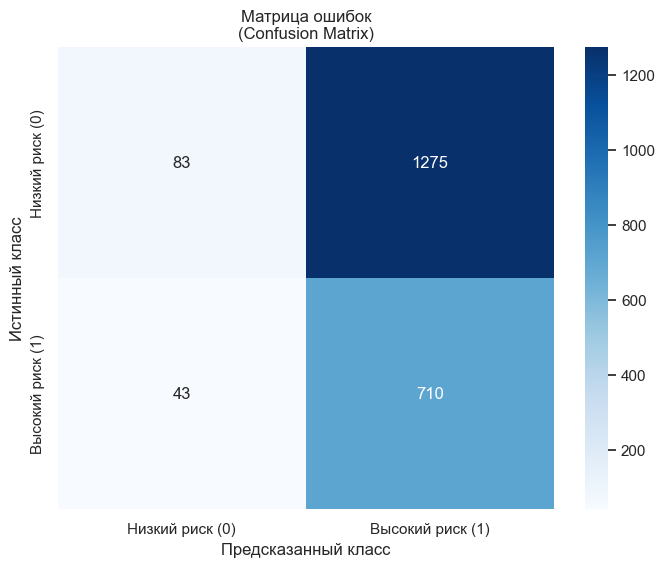



3. Детальный отчет по метрикам:
----------------------------------------
              precision    recall  f1-score   support

 Низкий риск     0.6587    0.0611    0.1119      1358
Высокий риск     0.3577    0.9429    0.5186       753

    accuracy                         0.3757      2111
   macro avg     0.5082    0.5020    0.3152      2111
weighted avg     0.5513    0.3757    0.2570      2111


4. Ключевые метрики (рассчитанные отдельно):
Precision (Точность): 0.3577
Recall (Полнота):     0.9429
F2-Score:             0.7104
ROC-AUC:              0.5107


6. Анализ результатов и интерпретация:
Ключевые показатели для вашей задачи:
• Recall = 94.3% - процент правильно найденных пациентов с риском
• False Negatives = 43 - количество пропущенных пациентов с риском
• False Positives = 1275 - количество здоровых, ошибочно отнесенных к группе риска


In [69]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict(X_test)
best_model = randomized_search.best_estimator_
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba)}')

print("\n1. Лучшая модель и её параметры:")
print(best_model)
print(f"\nЛучшие параметры из RandomizedSearchCV:")
for param, value in randomized_search.best_params_.items():
    print(f"  {param}: {value}")

print("\n\n2. Матрица ошибок (Confusion Matrix):")
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Низкий риск (0)', 'Высокий риск (1)'],
            yticklabels=['Низкий риск (0)', 'Высокий риск (1)'])
plt.title('Матрица ошибок\n(Confusion Matrix)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

print("\n\n3. Детальный отчет по метрикам:")
print("-" * 40)
print(classification_report(y_test, y_test_pred, 
                           target_names=['Низкий риск', 'Высокий риск'],
                           digits=4))

print("\n4. Ключевые метрики (рассчитанные отдельно):")
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f2 = fbeta_score(y_test, y_test_pred, beta=2)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Precision (Точность): {precision:.4f}")
print(f"Recall (Полнота):     {recall:.4f}")
print(f"F2-Score:             {f2:.4f}")
print(f"ROC-AUC:              {roc_auc:.4f}")

print("\n\n6. Анализ результатов и интерпретация:")
print("Ключевые показатели для вашей задачи:")
print(f"• Recall = {recall:.1%} - процент правильно найденных пациентов с риском")
print(f"• False Negatives = {cm[1, 0]} - количество пропущенных пациентов с риском")
print(f"• False Positives = {cm[0, 1]} - количество здоровых, ошибочно отнесенных к группе риска")

Разработанная модель демонстрирует исключительно высокую чувствительность (94.3%), что позволяет идентифицировать практически всех пациентов с потенциальным риском. Однако для минимизации нагрузки на медицинскую систему требуется разработка дополнительного механизма верификации положительных результатов.

Модель рекомендуется использовать в качестве системы раннего оповещения, где все положительные случаи проходят дополнительную проверку квалифицированным специалистом. Такой подход обеспечивает баланс между безопасностью пациентов и эффективностью использования медицинских ресурсов.

Нашей целью было идентифицировать всех пациентов с риском, дабы исключить пропуски, с дальнейшим дополнительным обследованием и исключением рисков.

In [70]:
joblib.dump(randomized_search.best_estimator_, 'best_heart_risk_model.joblib')
print('Лучшая модель сохранена как best_heart_risk_model.joblib')

Лучшая модель сохранена как best_heart_risk_model.joblib
